In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
# Used for Loading MNIST
from struct import unpack


In [20]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [77]:
train_img, train_lbl = loadmnist('/home/cgpag/Downloads/train-images-idx3-ubyte'
                                 , '/home/cgpag/Downloads/train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('/home/cgpag/Downloads/t10k-images-idx3-ubyte'
                               , '/home/cgpag/Downloads/t10k-labels-idx1-ubyte')


In [78]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)
print(train_lbl[0:20])
print(test_lbl[0:20])

(60000, 784)
(60000,)
(10000, 784)
(10000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


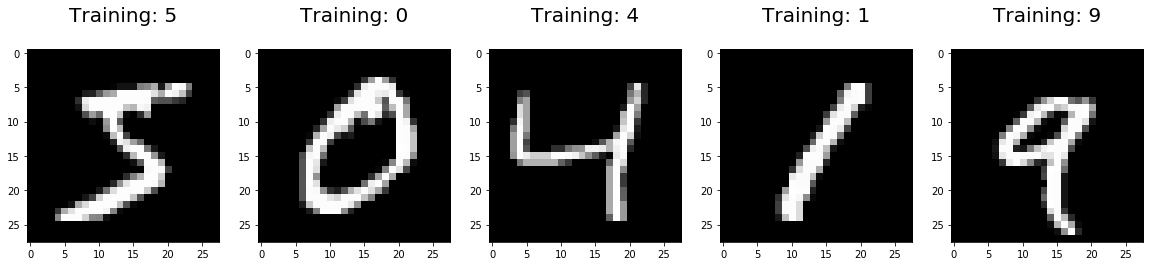

In [79]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [80]:
# This is how the computer sees the number 5
#print(train_img[3])
print(train_lbl[3:20])

[1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [83]:
new_class=[]
for i,(images,labels) in enumerate(zip(train_img[0:5000],train_lbl[0:5000])):
    if labels==0:
         new_class.append(1);
    else:
         new_class.append(2);

In [84]:
print(len(new_class))

5000


In [94]:
new_class_expected=[]
for i,(images,labels) in enumerate(zip(test_img[0:500],test_lbl[0:500])):
    if labels==0:
         new_class_expected.append(1);
    else:
         new_class_expected.append(2);

In [96]:
print(new_class[0:20])
print(train_lbl[0:20])
print(new_class_expected[0:20])

[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2]


In [97]:
logisticRegr.fit(train_img[0:5000], new_class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,784))

array([2])

In [100]:
# Predict for Multiple Observations (images) at Once
expected=new_class_expected
predicted=logisticRegr.predict(test_img[0:500])

In [102]:
score = logisticRegr.score(test_img[0:10], new_class_expected[0:10])
print(score)


1.0


In [103]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


Confusion matrix:
[[ 40   2]
 [  5 453]]
